In [20]:
clear all
cd "/Users/Charlie/Dropbox/Bankers in the Ivory Tower Book/2 Our New Financial Oligarchy/Data/Boards 2000 to 2017"
set scheme plotplain
use forbes400_alum_board_1989_2003_2017, clear
egen pehedge=rowtotal(pe hedge)
replace financedetail="non-financial" if financedetail==" non-financial"
gen nonfin=(financedetail=="non-financial" & technology!=1)



/Users/Charlie/Dropbox/Bankers in the Ivory Tower Book/2 Our New Financial Oligarchy/Data/Boards 2000 to 2017




(646 real changes made)



In [21]:
gen ob=1
collapse (sum) pehedge otherfin nonfin tech ob, by(year)
gen totalfin=pehedge +otherfin 

In [22]:
foreach var in pehedge otherfin totalfin tech {
    replace `var'=`var' / ob * 100
}


(3 real changes made)
(3 real changes made)
(3 real changes made)
(3 real changes made)


In [23]:
label var pehedge "private equity & hedge"
label var otherfin "other finance"
label var technology "technology"
label var totalfin "total finance"

In [24]:
list


     +----------------------------------------------------------------+
     | year   pehedge   otherfin   nonfin   techno~y    ob   totalfin |
     |----------------------------------------------------------------|
  1. | 1989      5.25       7.25      334          4   400       12.5 |
  2. | 2003      10.5      10.75      275         10   400      21.25 |
  3. | 2017     16.25       8.75      245      13.75   400         25 |
     +----------------------------------------------------------------+


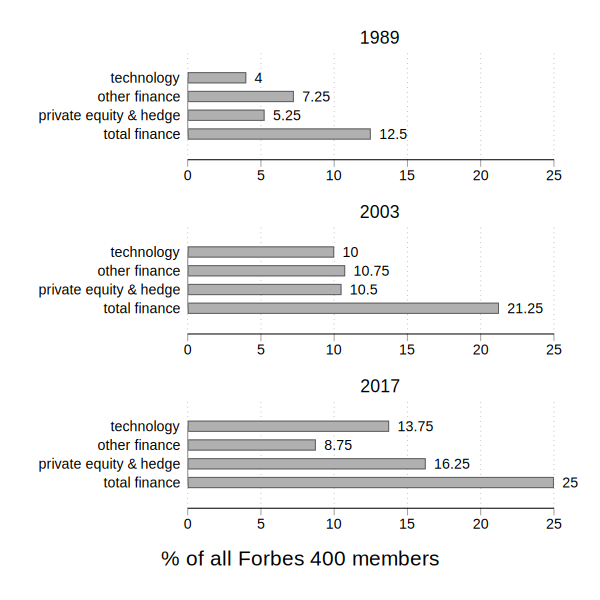

In [51]:
statplot tech otherfin pehedge totalfin, by(year, cols(1) note("") ixaxes ) name(Forbes_industry, replace) ///
ytitle("% of all Forbes 400 members") subtitle(, nobox)   ysize(6) blabel(bar)

graph display

In [52]:
graph export F1_Forbes_400_origin20190107.pdf, replace
graph export F1_Forbes_400_origin20190107.svg, replace


(file F1_Forbes_400_origin20190107.pdf written in PDF format)

(file F1_Forbes_400_origin20190107.svg written in SVG format)
